<h1> Implicit-Explicit Runge-Kutta: Gray-Scott Equation
</h1>

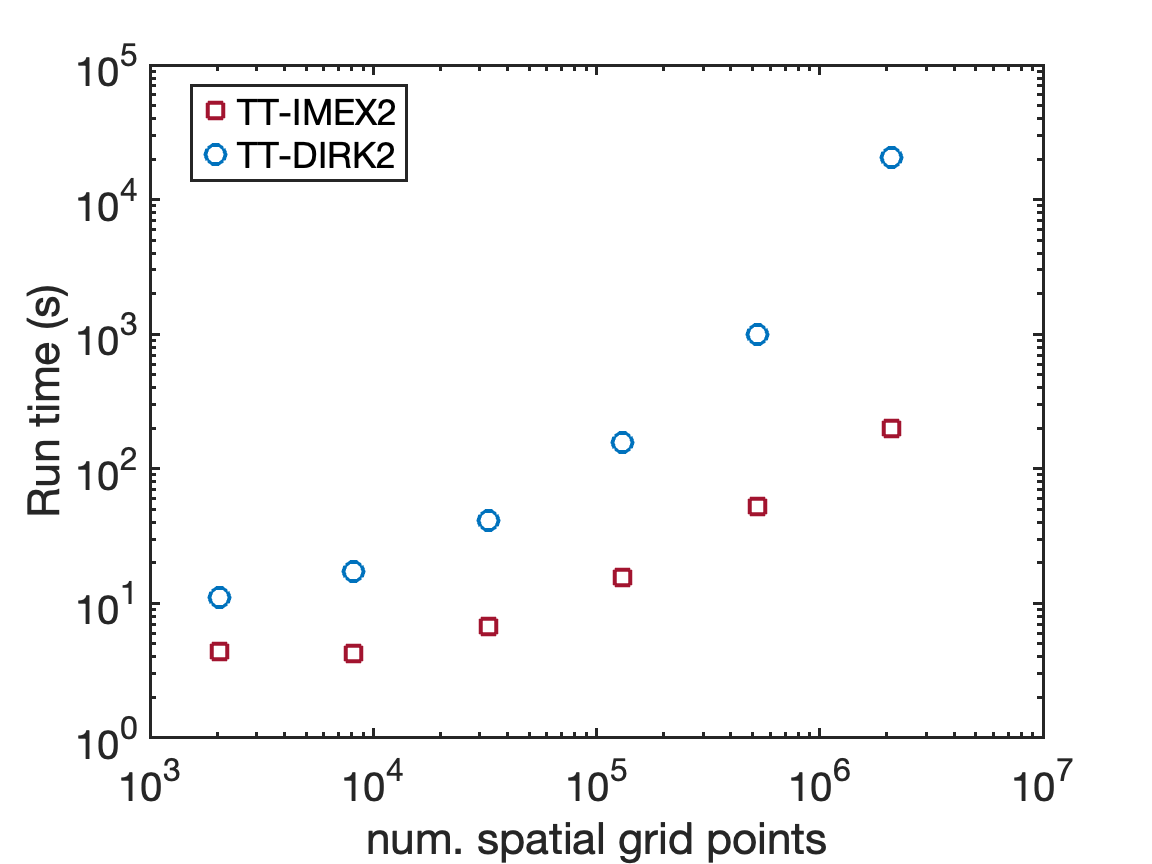

In [2]:
close all; clear; clc;

%%Computational cost plot

%% Set colors and markers
% colors
imexcolor = [0.6350 0.0780 0.1840]; %redish
dirkcolor = [0 0.4470 0.7410]; %blueish
fgcolor = [0 0 0]; %black

% markers
imexmark = 'square';
dirkmark = 'o';
fgmark = '*';

%% load and plot IMEX
temp = load('efficiency_imex_step.mat');
N = temp.Nvalues;
num_entries = 2*N.^2;
mname = temp.mname;

% tt-imex
R = temp.R;
tt_times = cellfun(@(c) c.time, R);
tt_lits_imex = cellfun(@(c) c.lits, R);
Compr_imex = cellfun(@(c) compress_ratio_tt(c.Ytt{end}),R);
ranks_imex =  cellfun(@(c) max(c.Ytt{end}.r),R);

figure() % Run time 
loglog(num_entries,tt_times, ...
        'color',imexcolor,'Marker',imexmark,'LineStyle','none','DisplayName','TT-IMEX2')
hold on


%% load and plot DIRK
temp = load('efficiency_dirk_step.mat');
N = temp.Nvalues;
num_entries = 2*N.^2;
mname_dirk = temp.mname;

% tt
R = temp.R;
tt_times = cellfun(@(c) c.time, R);
tt_lits_dirk = cellfun(@(c) c.lits, R);
Compr_dirk = cellfun(@(c) compress_ratio_tt(c.Ytt{end}),R);
ranks_dirk = cellfun(@(c) max(c.Ytt{end}.r),R);

loglog(num_entries,tt_times, ...
        'color',dirkcolor,'Marker',dirkmark,'LineStyle','none','DisplayName','TT-DIRK2')
hold on
% loglog(num_entries,ytt, 'm-','DisplayName',['slope (', num2str(p(1)), ')'])

hAxis = gca;
hAxis.XTick = 10.^(3:7);
xlabel('num. spatial grid points'), ylabel('Run time (s)')
legend('Location','best')
hold off
% 
% subplot(1,2,2) % Total num interations
% loglog([num_entries,num_entries_large], [1./Compr,1./Compr_large], 'rv')
% xlabel('num. spatial grid points'), ylabel('Compression Ratio')
% hAxis = gca;
% hAxis.XTick = 10.^(3:7);
% saveas(gcf,'figs/appraisalfigs/gs_dirk_imex_runtime','epsc')
